# PCA on Random Data

## Steps
1. Initialize a pseudo random number generator with a random seed.
2. Sample from a univariate "normal" (Gaussian) distribution an array of 20 by 2 samples.
3. Plot the sample values.
4. Create a 2 by 2 matrix and fill it with random values from a uniform distribution having values 0 and 1.
5. Multiply the matrices from (2) and (4).
6. Plot the resulting sample values.
7. Compute the variance among the data axes.
8. Compute the covariance matrix.
9. Compute the eigenvalues and eigenvectors of the covariance matrix.
10. Keeping both eigenvectors, perform a change of basis.
11. Compute the proportion of variance due to both eigenvectors.
12. Plot the data values in the new basis.
13. Calculate the new covariance matrix.
14. Repeat steps (10) and (12) using only one eigenvector.



In [1]:
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initialize a pseudo random number generator with a random seed.

# random_seed = np.random.randint(0, 1000)
random_seed = 0

np.random.seed(random_seed)

In [3]:
# Sample from a univariate "normal" (Gaussian) distribution an array of 20 by 2 samples.
dataset = np.random.normal(loc=0, scale=1, size=(20,2)) # loc is mean, so loc = 0 and scale is standard deviation, so scale = 1
dataset

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275]])

In [4]:
x=dataset[:,0]
y=dataset[:,1]
x.shape, y.shape # 20 data each

((20,), (20,))

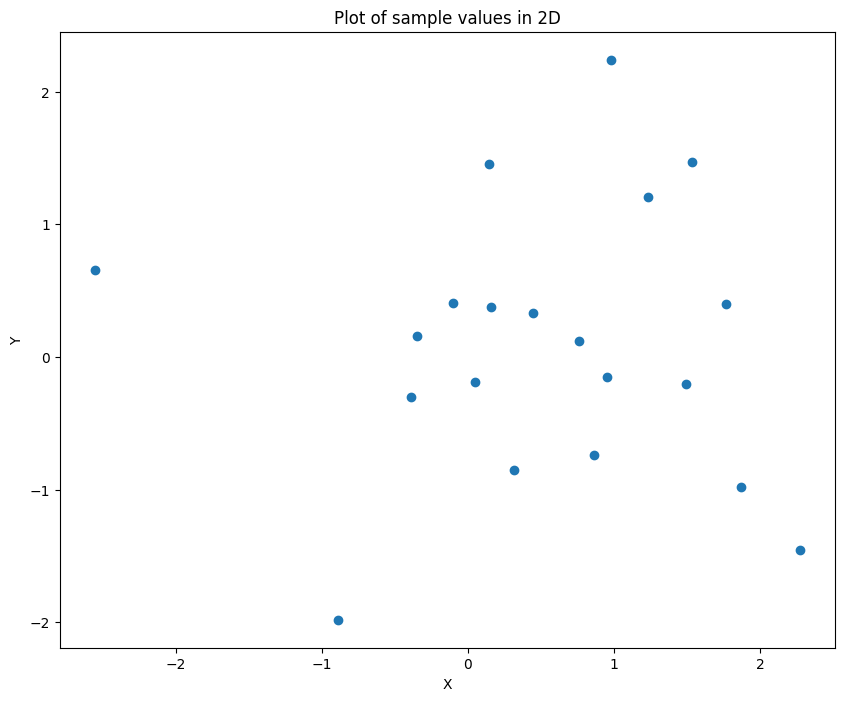

In [5]:
# Plot the sample values.
plt.figure(figsize=(10,8))
plt.title("Plot of sample values in 2D")
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
# Create a 2 by 2 matrix and fill it with random values from a uniform distribution having values 0 and 1
np.random.seed(0)

p_matrix = np.random.uniform(low=0.0, high=1.0, size=(2,2))
p_matrix

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [7]:
# Compute the variance among the data axes.
variance = [x.var(), y.var()]
variance

[1.170684681405265, 1.003147509748088]

In [8]:
# Multiply the matrices from dataset and p_matrix.
new_dataset = np.dot(dataset, p_matrix)
new_dataset

array([[ 1.20933586,  1.47967041],
       [ 1.88787297,  1.92100802],
       [ 0.43587373,  0.80315533],
       [ 0.43018877,  0.59702114],
       [ 0.19084584,  0.14990719],
       [ 0.95563587,  0.89542761],
       [ 0.49100902,  0.61058476],
       [ 0.4447248 ,  0.49925979],
       [ 0.69630888,  0.95676218],
       [-0.34300185, -0.24147971],
       [-1.00713794, -1.46972539],
       [ 0.02706437,  0.21384234],
       [ 0.36903362,  0.83084497],
       [-0.08771468, -0.06926733],
       [ 1.72688558,  1.89685628],
       [ 0.31297976,  0.31687115],
       [-1.68118037, -1.71423761],
       [-0.09669745, -0.16363115],
       [ 1.39995068,  1.53504737],
       [-0.39478721, -0.44173171]])

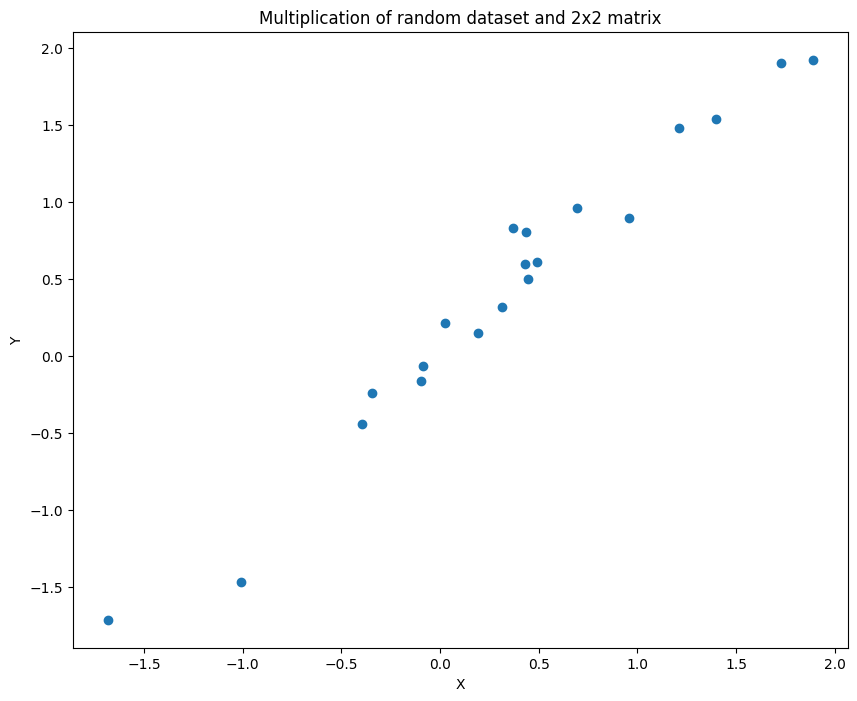

In [28]:
x=new_dataset[:,0]
y=new_dataset[:,1]

plt.figure(figsize=(10,8))
plt.title("Multiplication of random dataset and 2x2 matrix")
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
# Compute the covariance matrix.
cov_matrix = np.cov(new_dataset, rowvar=False) # rowvar means each row as variable(feature) and each column as data
# But in our data each column represent features and each row as data
cov_matrix

array([[0.74505332, 0.81972305],
       [0.81972305, 0.93232565]])

In [11]:
# Compute the eigenvalues and eigenvectors of the covariance matrix.
value, vector = np.linalg.eig(cov_matrix)
value, vector

(array([0.01363578, 1.66374319]),
 array([[-0.7461538 , -0.66577361],
        [ 0.66577361, -0.7461538 ]]))

In [12]:
# Maximum eigen value
max_value = np.max(value)
max_value

1.6637431893476098

In [13]:
# Keeping both eigenvectors, perform a change of basis.
transformed_data = np.dot(new_dataset, vector)
transformed_data

array([[ 8.27749644e-02, -1.90920561e+00],
       [-1.29687152e-01, -2.69026345e+00],
       [ 2.09490786e-01, -8.89470634e-01],
       [ 7.64939299e-02, -7.31877923e-01],
       [-4.25960954e-02, -2.38913946e-01],
       [-1.16899263e-01, -1.30436386e+00],
       [ 4.01429692e-02, -7.82490991e-01],
       [ 5.60895099e-04, -6.68610630e-01],
       [ 1.17433489e-01, -1.17747582e+00],
       [ 9.51613129e-02,  4.08542587e-01],
       [-2.27024579e-01,  1.76716705e+00],
       [ 1.22176407e-01, -1.77578015e-01],
       [ 2.77798816e-01, -8.65630986e-01],
       [ 1.93322815e-02,  1.10082197e-01],
       [-2.56453908e-02, -2.56506138e+00],
       [-2.25665867e-02, -4.44808276e-01],
       [ 1.13124964e-01,  2.39837044e+00],
       [-3.67901263e-02,  1.86472614e-01],
       [-2.25844887e-02, -2.07743165e+00],
       [ 4.78668087e-04,  5.92438702e-01]])

In [14]:
# Compute the proportion of variance due to both eigenvectors.
sum = np.sum(value) # Sum of eigenvalues
prop_of_var = [value[0]/sum, value[1]/sum]
prop_of_var # Here value[1] will carry most of the values.

[0.00812921975838951, 0.9918707802416105]

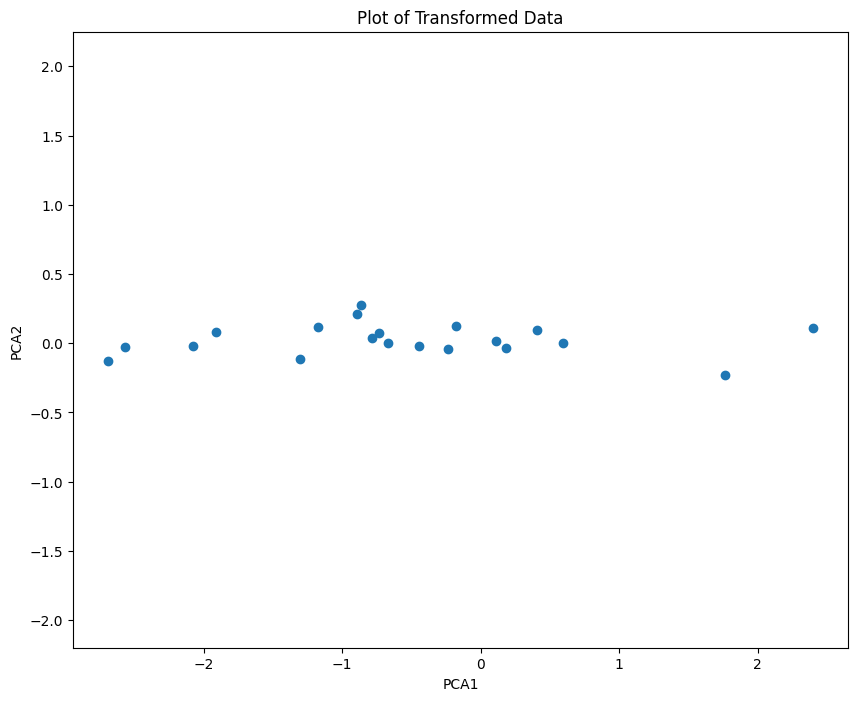

In [30]:
# Plot the data values in the new basis.
x=transformed_data[:,1]
y=transformed_data[:,0]
x.shape, y.shape # 20 data each

plt.figure(figsize=(10,8))
plt.title("Plot of Transformed Data")
plt.scatter(x,y)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.axis('equal')
plt.show()

In [16]:
# Calculate the new covariance matrix.
new_cov_matrix = np.cov(transformed_data, rowvar=False)
new_cov_matrix

array([[ 1.36357823e-02, -1.65123959e-18],
       [-1.65123959e-18,  1.66374319e+00]])

In [17]:
# Change of basis (using only one eigenvector as new basis)
reduced_transformed_data = np.dot(transformed_data, vector[1])
reduced_transformed_data.shape, reduced_transformed_data # Reduced to 1D

((20,),
 array([ 1.47967041,  1.92100802,  0.80315533,  0.59702114,  0.14990719,
         0.89542761,  0.61058476,  0.49925979,  0.95676218, -0.24147971,
        -1.46972539,  0.21384234,  0.83084497, -0.06926733,  1.89685628,
         0.31687115, -1.71423761, -0.16363115,  1.53504737, -0.44173171]))

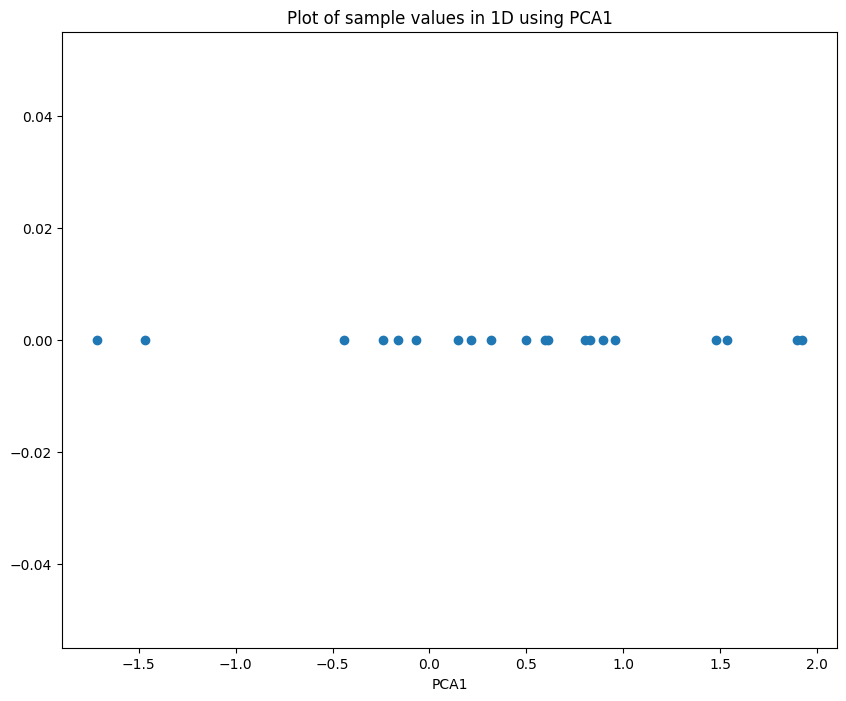

In [32]:
# Plot the data values in the new basis.
plt.figure(figsize=(10,8))
plt.title("Plot of sample values in 1D using PCA1")
plt.scatter(reduced_transformed_data, np.zeros_like(reduced_transformed_data))
plt.xlabel("PCA1")
# plt.ylabel("Y")
# plt.axis("equal")
plt.show()